# Data Segmentation Tutorial

Contents:
- Initial setup (install requirements, import libraries and datasets)
- Dataset partitioning
- Issues

# Initial setup

## Preamble

In this section, a set of required packages is installed and the connection to the source datasets is established.

In [493]:
!pip install netCDF4 h5py geopandas descartes rasterio

Next we need to get access to the data. This tutorial performs this by mouting the google drive in the hosted runtime so that we do not have to waste time uploading the large data files directly. Just run the next cell, follow the link, and copy the autorization code to the white box that will appear in the cell.

In [494]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Setting up libraries

The working environment used in this project is heavily based on ```xarray```. In addition, the ```geopandas```and ``rasterio```packages are used for data segmentation tasks. This tutorial offers a small example of the general procedure to partition the data corresponding to a specific country.

Below, the required packages are imported:

In [0]:
import numpy as np
import xarray as xr
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from IPython.display import clear_output
%matplotlib inline
import os
from rasterio import features

## Import geographic datasets

Now define all the paths to the required files, that is the geographic dataset and the features dataset.

Regarding **geographic datasets**, the Global Admnistrive Areas Database contains areas for each country worldwide. Alternative, for european territories NUTS units can be used.


In this tutorial, we focus on the Portugal, and the corresponding directories of either dataset are defined as follows:

In [0]:
nuts_data_dir =  "/content/gdrive/My Drive/projects/ESoWC/datasets/regional_data/NUTS/NUTS_RG_20M_2016_4326_LEVL_0.shp/"
gadm_data_dir =  "/content/gdrive/My Drive/projects/ESoWC/datasets/regional_data/GADM/gadm36_PRT_shp/gadm36_PRT_0.shp"

First, to import the dataset, use the ```geopandas``` function to read the file:

In [0]:
nuts = gpd.read_file(nuts_data_dir) # import NUTS dataset
gadm = gpd.read_file(gadm_data_dir) # import GADM dataset

In [498]:
nuts

,NUTS_ID,LEVL_CODE,CNTR_CODE,NUTS_NAME,FID,geometry
0,ES,0,ES,ESPAÑA,ES,"(POLYGON ((-7.03184 43.54447, -6.29214 43.5699..."
1,FI,0,FI,SUOMI / FINLAND,FI,"(POLYGON ((28.92968 69.0519, 28.62465 68.93047..."
2,IS,0,IS,ÍSLAND,IS,"POLYGON ((-22.0074 63.83599, -22.13087 63.8366..."
3,FR,0,FR,FRANCE,FR,"(POLYGON ((2.60704 50.91269, 2.64799 50.82501,..."
4,HR,0,HR,HRVATSKA,HR,"(POLYGON ((16.59681 46.4759, 16.85476 46.35044..."
5,HU,0,HU,MAGYARORSZÁG,HU,"POLYGON ((22.12108 48.37831, 22.15531 48.4034,..."
6,AL,0,AL,SHQIPËRIA,AL,"POLYGON ((19.831 42.46645, 20.0763 42.55582, 2..."
7,AT,0,AT,ÖSTERREICH,AT,"POLYGON ((15.75363 48.85218, 16.29009 48.73395..."
8,BE,0,BE,BELGIQUE-BELGIË,BE,"POLYGON ((4.75993 51.50246, 4.864 51.43362, 5...."
9,BG,0,BG,БЪЛГАРИЯ,BG,"POLYGON ((22.99717 43.80787, 23.40948 43.84985..."


In [499]:
gadm

,GID_0,NAME_0,geometry
0,PRT,Portugal,"(POLYGON ((-16.05836296 30.03023148, -16.05834..."


As presented in the tables, the geopandas dataframes contain the name, atributes and geometries of each country.

To verify all territories are included, inspect the geometry containted in the dataframe:

Text(66.375, 0.5, 'Latitude [Degrees North]')

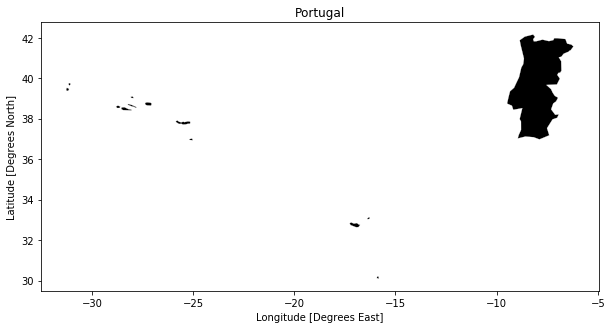

In [500]:
# defining and plotting Portugal
PT = nuts[nuts.NUTS_ID == 'PT']
ax = ax = PT.plot(figsize=(10,5), linewidth=0.25, edgecolor='white', color='black')
ax.set_title("Portugal")
ax.set_xlabel('Longitude [Degrees East]')
ax.set_ylabel('Latitude [Degrees North]')

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:65: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


Text(66.375, 0.5, 'Latitude [Degrees North]')

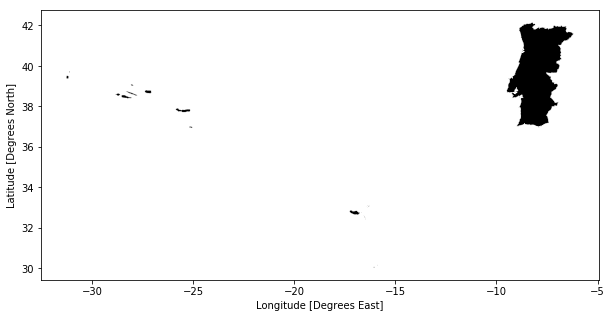

In [501]:
# defining and plotting Portugal
PT.gadm = gadm[gadm.GID_0 == 'PRT']
ax = ax = PT.gadm.plot(figsize=(10,5), linewidth=0.25, edgecolor='white', color='black')
ax.set_xlabel('Longitude [Degrees East]')
ax.set_ylabel('Latitude [Degrees North]')

Not the regions between the NUTS and GADM datasets vary slightly in detail.

## Import Fire Weather System datasets

In [0]:
raw_data_dir = "../content/gdrive/My Drive/projects/ESoWC/datasets/raw_data/"

In [503]:
os.listdir("../content/gdrive/My Drive/projects/ESoWC/datasets/raw_data")

['fwi.nc', 'ffmc.nc', 'dc.nc', 'dmc.nc', 'bui.nc', 'isi.nc', 'dsr.nc']

This tutorial notebook will focus on the Fire Weather Index feature. Next import the NETCFD4 file as follows:

In [0]:
# Set dataset path
fwiDatasetPath = raw_data_dir + 'fwi.nc'
fwiDatasetPath

# import dataset using xarray
ds = xr.open_dataset(fwiDatasetPath)

Text(0.5, 1.0, '2018 - 06 - 30')

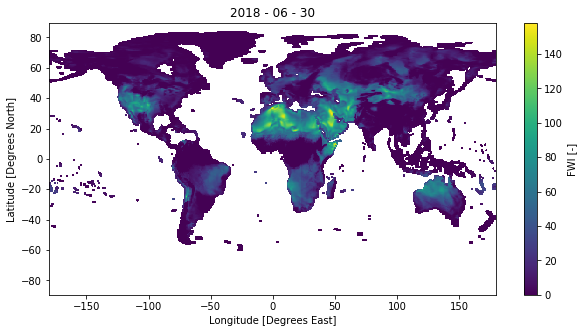

In [505]:
x = ds.lon
y = ds.lat

# Get date as a string
date = pd.to_datetime(str(ds.time[-1].values)).strftime('%Y - %m - %d')

# Plot
fig = plt.figure(figsize=(10,5))
plt.pcolormesh(x,y,ds.fwi[-1])
plt.colorbar().set_label('FWI [-]')
plt.xlabel('Longitude [Degrees East]')
plt.ylabel('Latitude [Degrees North]')
plt.title(date)

Next, we define a subset of the fwi.nc dataset, in order to concentrate on the Portugal region. This dataset will be defined in ```fwiPT```:

# Dataset partitioning

Large datasets are not managable to keep in memory when running code with high computational load. For this reason, before setting up the modeling pipepline the **raw data** will be partitioned and segmented. This process is instrumental for the success of the modeling approach and each step requires careful inspection, to ensure the partitioning steps are working as expected.

In [0]:
# define the approximate bounds for the Portugal region
latBounds = [43, 32]
lonBounds = [-34, -5]

fwiPT = ds.loc[dict(time = slice('1980-01-01', '2018-06-30'),
              lat = slice(latBounds[0],latBounds[1]), 
            lon = slice(lonBounds[0],lonBounds[1])
           )]

To inspect the current dataset we will plot the ```fwiPT``` over the PT geometry from the NUTS shapes. 

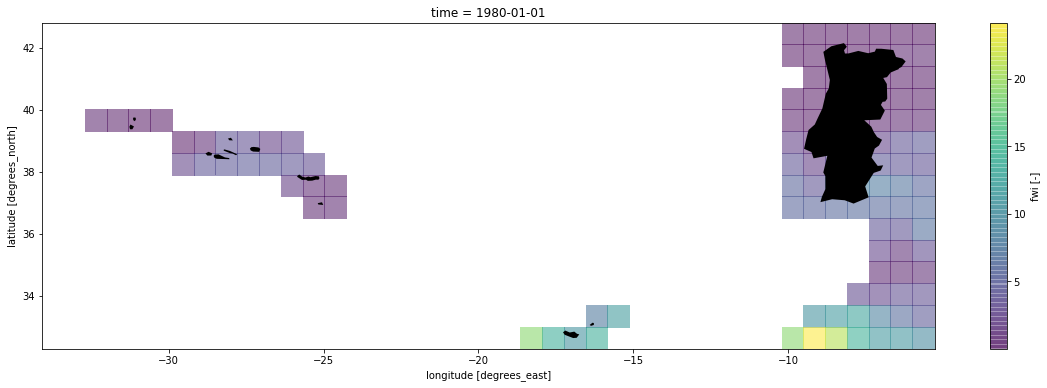

In [507]:
# Plot the fwiPT values over the Portugal region
ax = PT.plot(figsize=(20,6), alpha=1, color="black")
fwiPT.fwi[0].plot(ax=ax, alpha=0.5, zorder=-1)

The next step grabs the geometries from the NUTS dataset in the geopandas dataframe, and creates a list with all the shapes for a given country.

In [508]:
# get geometry of country
geometries = PT.geometry[19]
# create list of shapes (geometry, index)
shapes = [(shape,n) for n, shape in enumerate(geometries)]
shapes # list shapes contained in Portugal NUTS 0

[(<shapely.geometry.polygon.Polygon at 0x7f0288369438>, 0),
 (<shapely.geometry.polygon.Polygon at 0x7f0288369dd8>, 1),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e068d0>, 2),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e245c0>, 3),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24358>, 4),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24128>, 5),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e241d0>, 6),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24978>, 7),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24a58>, 8),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24630>, 9),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24400>, 10),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24518>, 11),
 (<shapely.geometry.polygon.Polygon at 0x7f0287e24240>, 12)]

In NUTS_0, for Portugal there are a total of 13 different polygons, including the main land and the islands of Azores and Madeira.

**NOTE:** although this lists all the shapes, for some reason the function used to rasterize the data does not work properly with this setup. Instead, use the following command:

In [0]:
shapes = zip(PT.geometry, range(len(PT)))

Recall the ```xarray``` dataset we defined for Portugal at the beginning of this section:

In [510]:
fwiPT

<xarray.Dataset>
Dimensions:  (lat: 15, lon: 41, time: 14061)
Coordinates:
  * lon      (lon) float32 -33.75 -33.046875 -32.34375 ... -6.328125 -5.625
  * lat      (lat) float32 42.45604 41.754288 41.052536 ... 33.333263 32.631508
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-06-30
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    history:           Fri Aug 31 16:18:06 2018: cdo cat /hugetmp/fire/geff/r...
    Conventions:       CF-1.6
    Reference date:    19800101
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.8.2 (http://mpimet.mp...

Although we imported the data using `xarray`, we need to segment the dataset using the areas in raster type. Then, we need to **rasterize** our dataset using the functions defined below:

In [0]:
# based on functions from:
from affine import Affine
def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='lat', longitude='lon',
              fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.
    """
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    #requires the features library from rasterio
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform, all_touched=True,dtype=float,**kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

In [0]:
# create raster for regions contained in Portugal
rasterPT = rasterize(shapes, fwiPT.coords, longitude='lon', latitude='lat')

To diferentiate from the original subset `fwiPT` we will create the segmented data in a new variable `dsPT`:

In [513]:
dsPT = fwiPT # copy the original fwi values
dsPT['fwiPT'] = rasterPT # create new coordinate based on the raster coordinates
dsPT

<xarray.Dataset>
Dimensions:  (lat: 15, lon: 41, time: 14061)
Coordinates:
  * lon      (lon) float32 -33.75 -33.046875 -32.34375 ... -6.328125 -5.625
  * lat      (lat) float32 42.45604 41.754288 41.052536 ... 33.333263 32.631508
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-06-30
Data variables:
    fwi      (time, lat, lon) float32 ...
    fwiPT    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    history:           Fri Aug 31 16:18:06 2018: cdo cat /hugetmp/fire/geff/r...
    Conventions:       CF-1.6
    Reference date:    19800101
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.8.2 (http://mpimet.mp...

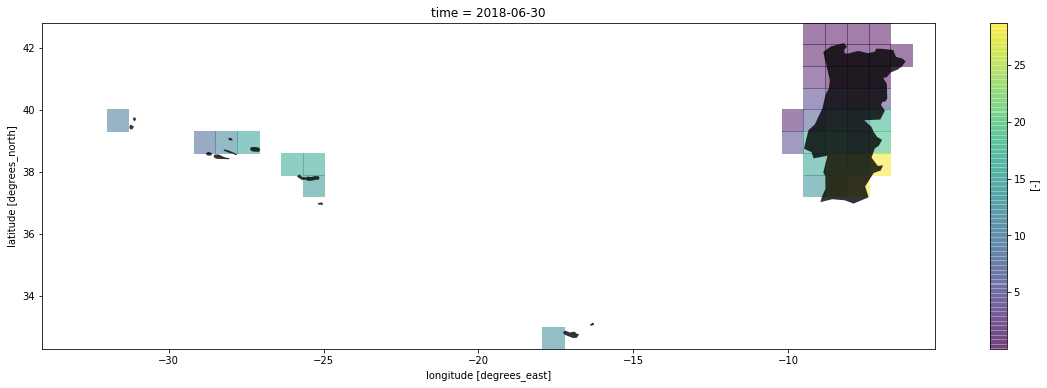

In [514]:
segPT = dsPT.fwi[-1].where(dsPT.fwiPT == 0)

# plot
ax = PT.plot(figsize=(20,6), alpha=0.8, color="black")
segPT.plot(ax=ax, alpha=0.5, zorder=-1)

As can be observed, <font color=blue>**not all regions contained in the NUTS are in the segmentation**</font> , depite that the data is available in the **FWI dataset**, which can be inspected in the next figure for comparison.

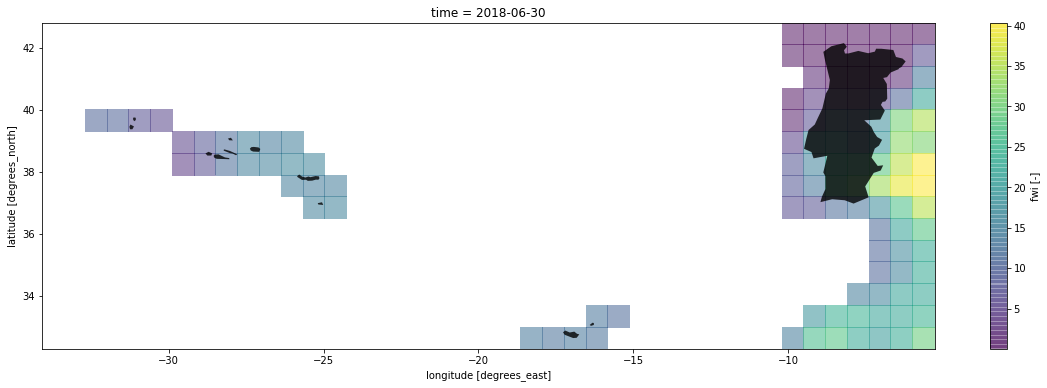

In [515]:
latBounds = [43, 32]
lonBounds = [-34, -5]

ax = PT.plot(figsize=(20,6), alpha=0.8, color="black")

fwiPT.fwi[-1].plot(ax=ax,alpha=0.5, zorder=-1)

# Issues

By performing this initial test two main issues emerged that are connected:

**1. Segmentation error**: not all the areas in the PT region are segmented correctly;

**2. Transformation offset**: there appears to be an offset in between the NUTS/GADM and FWI points available

### 1. Segmentation error

The segmentation error identified occurs after segmenting the data using the `rasterPT` coordinates. The `rasterize` function is based on Stephan Hoyer function available at: https://gist.github.com/shoyer/0eb96fa8ab683ef078eb.

Changes were introduced with the `all_touched=True` option, to guarantee that the cells containing coordinates within the shapefile of Portugal were included in the segmentation. 

However, the Affine transformation performed in the code appears to introduce some error as will be observed more closely in the next issue.

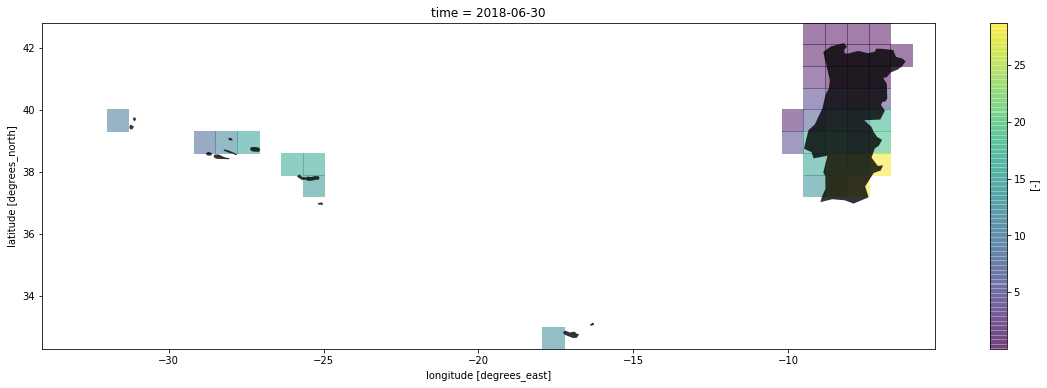

In [516]:
# plot
ax = PT.plot(figsize=(20,6), alpha=0.8, color="black")
segPT.plot(ax=ax, alpha=0.5, zorder=-1)

### 2. Transformation offset

When plotting directly the values where rasterPT is not 'nan', there appears to be an offset, probably introduced by the affine translation and scale transformation.

Looking at the rasterized shape the cells appear to be up and to the left than they should, as can be observed in the figure below. 

This is most likely the reason why the segmentation was missing some islands in the first place.

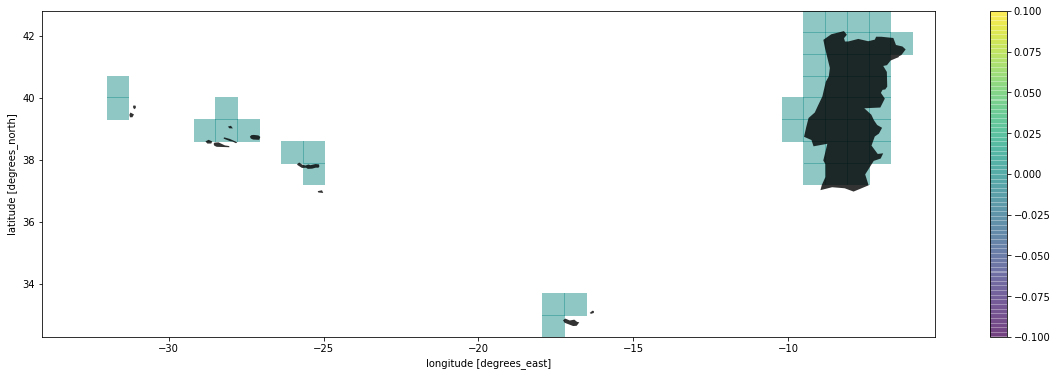

In [517]:
f_PT = rasterPT.where(rasterPT!=np.nan)
ax = PT.plot(figsize=(20,6), alpha=0.8, color="black")
f_PT.plot(ax=ax, alpha=0.5,zorder=-1)

While we do not know the reason for this mismatch, by applying a correction on the translation, we are able to get cells on the remaining areas. To show this we will redefine the function with a small change in the `tranform_from_latlon`:

In [0]:
def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(1.008*lon[0], 1.006*lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

In [0]:
shapes = zip(PT.geometry, range(len(PT)))
new_rasterPT = rasterize(shapes, fwiPT.coords, longitude='lon', latitude='lat')

Visualizing the corrected raster, we obtain the following:

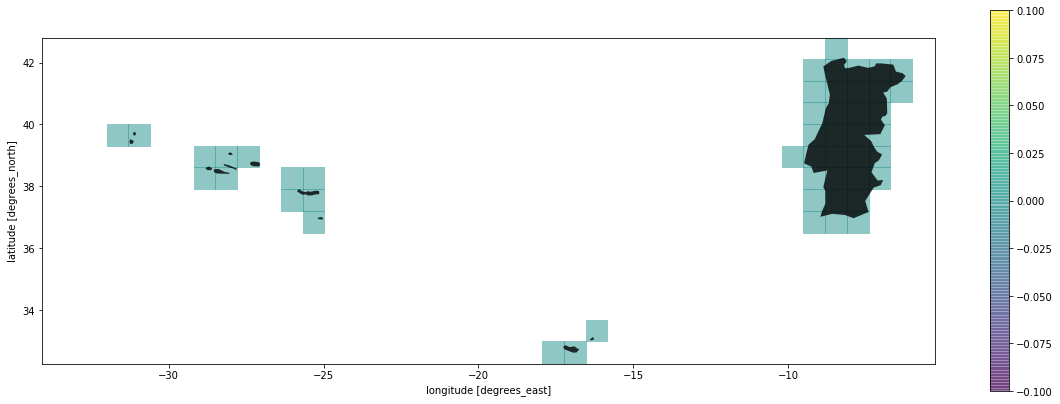

In [520]:
ax = PT.plot(figsize=(20,7), alpha=0.8, color="black")
new_rasterPT.plot(ax=ax, alpha=0.5,zorder=-1)

Now the zeros are placed in cells over all the territories of the PT region. Nevertheless, this offset we added is entirely arbitrary, so we do not know if this shift in coordinates may be introducing additional errors in the segmentation.

To complete this approach, the segmentation of the **FWI dataset** yields the following:

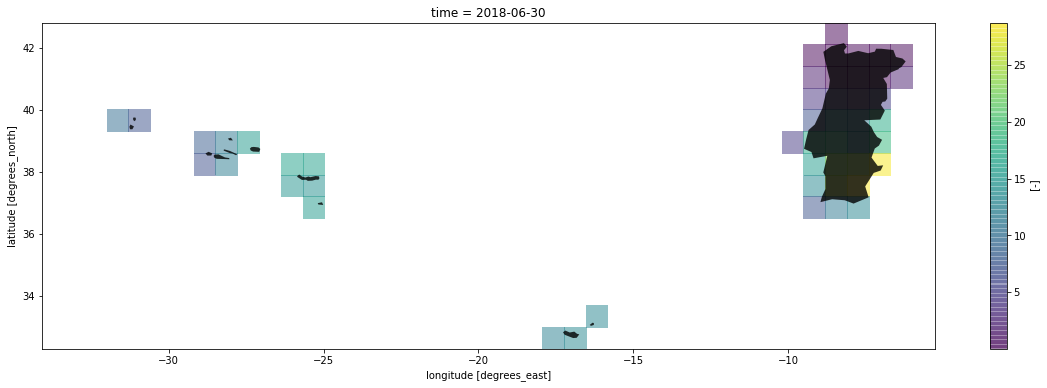

In [521]:
new_dsPT = fwiPT # copy the original fwi values
new_dsPT['fwiPT'] = new_rasterPT # create new coordinate based on the raster coordinates

seg_new_rasterPT = new_dsPT.fwi[-1].where(new_dsPT.fwiPT == 0)

# plot
ax = PT.plot(figsize=(20,6), alpha=0.8, color="black")
seg_new_rasterPT.plot(ax=ax, alpha=0.5, zorder=-1)

Comparing with the original FWI dataset illustrated below, the segmentation appears to have been successful with the correction introduced. However, there should be a way to determine this offset, either when working with NUTS or GADM shapes, otherwise, this process may be prone to errors.

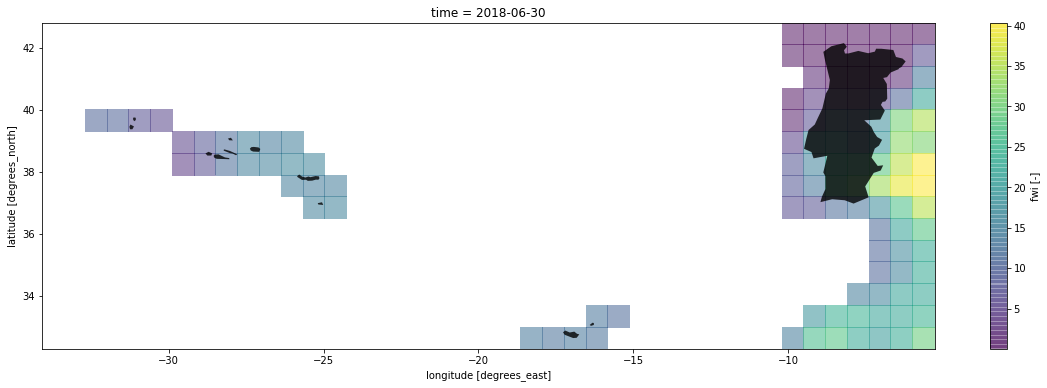

In [522]:
latBounds = [43, 32]
lonBounds = [-34, -5]

ax = PT.plot(figsize=(20,6), alpha=0.8, color="black")
fwiPT.fwi[-1].plot(ax=ax,alpha=0.5, zorder=-1)